1.What is a Decision Tree, and how does it work in the context of
classification?

Ans:-🌳 What is a Decision Tree:-

A Decision Tree is a tree-like model of decisions. It breaks down a dataset into smaller and smaller subsets while at the same time developing an associated tree incrementally.

**Root Node**: The first decision based on the most important feature.

**Internal Nodes**: These represent decisions based on certain features.

**Branches**: Outcomes of those decisions.

**Leaf Nodes**: Final output or class label (e.g., "Yes"/"No", "Spam"/"Not Spam").

⚙️ How Does It Work in Classification:-

- Let's say we want to classify whether a person will buy a laptop or not based on features like age, income, and student status.

1. Choose the Best Feature to split the data using a criterion like:

-  Gini Index

-  Information Gain (based on Entropy)

-  Gain Ratio

2. Split the Dataset: Based on the selected feature, divide the data into subsets.

3. Repeat the Process: For each subset, continue selecting the best features and splitting further until:

- All data points in a node belong to the same class.

- A stopping condition is met (e.g., max depth reached).

5. Make Predictions: For a new data point, traverse the tree from the root to a leaf node based on its features, and assign the class label of the leaf node.



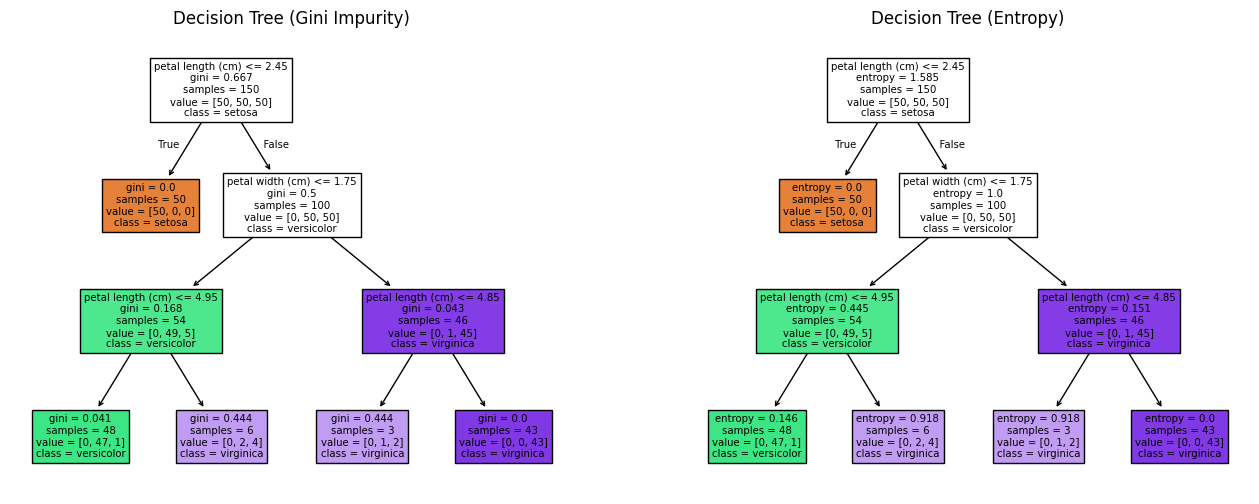

In [ ]:
#2. Explain the concepts of Gini Impurity and Entropy as impurity measures.How do they impact the splits in a Decision Tree?
# 📚 Import required libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 📊 Load Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target

# 🌳 Decision Tree using Gini Impurity
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_gini.fit(X, y)

# 🌳 Decision Tree using Entropy (Information Gain)
tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree_entropy.fit(X, y)

# 📈 Plotting both trees side by side
plt.figure(figsize=(16, 6))

# Gini Tree
plt.subplot(1, 2, 1)
plot_tree(tree_gini, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree (Gini Impurity)")

# Entropy Tree
plt.subplot(1, 2, 2)
plot_tree(tree_entropy, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree (Entropy)")

plt.show()





```
## 🔍 Gini Impurity vs Entropy in Decision Trees

- **Gini Impurity** measures how often a randomly chosen element would be misclassified.
- **Entropy** measures the amount of uncertainty or disorder in a node.

### ⚖️ Key Differences:
| Measure       | Formula                                  | Goal                          |
|---------------|-------------------------------------------|-------------------------------|
| Gini          | 1 - Σ (pᵢ²)                               | Minimize misclassification    |
| Entropy       | -Σ (pᵢ log₂ pᵢ)                           | Maximize information gain     |

- Both aim to find the **best split** in the dataset.
- In practice, they often produce **very similar trees**.
- Gini is **faster** to compute, while Entropy gives slightly more **information-rich** splits.

📌 Both are valid — try both and see which works best for your dataset!

```



3. What is the difference between Pre-Pruning and Post-Pruning in Decision
Trees? Give one practical advantage of using each.

Ans:-
```
| Feature     | **Pre-Pruning (Early Stopping)**                            | **Post-Pruning (Reduced Error Pruning)**     |
| ----------- | ----------------------------------------------------------- | -------------------------------------------- |
| **When**    | Stops tree growth **while building** it                     | Prunes the tree **after full growth**        |
| **How**     | Sets conditions like `max_depth`, `min_samples_split`, etc. | Removes branches that don't improve accuracy |
| **Speed**   | Faster, less resource-intensive                             | Slower, since full tree is built first       |
| **Risk**    | Might **underfit** if stopped too early                     | Less risk of underfitting                    |
| **Control** | Controlled using parameters                                 | Requires validation set or cross-validation  |

```

🎯 Practical Example & Advantage

✅ Pre-Pruning Advantage:

Faster training on large datasets.

- 💡 Example: Set max_depth=5 to avoid building a deep tree that overfits a large dataset with noise.


```
tree = DecisionTreeClassifier(max_depth=5)

```

✅ Post-Pruning Advantage:

Better generalization by removing unnecessary complexity.

- 💡 Example: First build a full tree, then prune branches with minimal impact using cost-complexity pruning (ccp_alpha in sklearn).


```
tree = DecisionTreeClassifier(ccp_alpha=0.01)

```




4.What is Information Gain in Decision Trees, and why is it important for
choosing the best split?

Ans:-

## 📘 What is Information Gain in Decision Trees?

**Information Gain (IG)** helps a Decision Tree decide which feature to split on by measuring how much **entropy (disorder)** is reduced.

### 📊 Formula:
**Information Gain = Entropy(Parent) - Weighted Avg. Entropy(Children)**

- Entropy measures how mixed a set of classes is.
- IG tells us how much uncertainty is removed by a split.

### ✅ Example:
If we split the dataset and reduce the entropy from 1.0 to 0.3, then:

**Information Gain = 1.0 - 0.3 = 0.7**

Higher IG = Better split = More class separation

---

### 🌳 Why It’s Important:
- Helps the tree grow in the most **informative** way.
- Used by **ID3** and **C4.5 algorithms**.
- Prefers features that **increase certainty** in class prediction.

📌 This notebook shows a decision tree built using **Entropy**, which means it uses **Information Gain** to choose the best splits.


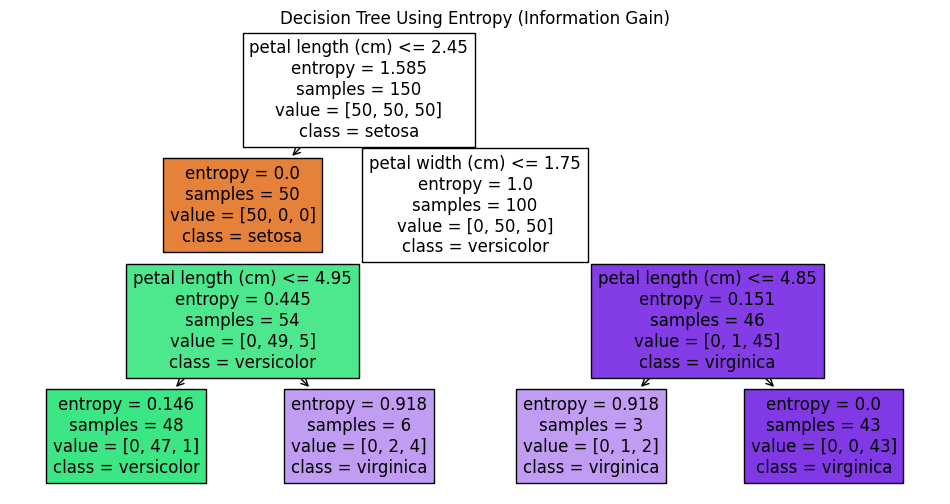

In [ ]:
# 📚 Import required libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 📊 Load Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target

# 🌳 Decision Tree using Entropy (Information Gain)
tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree_entropy.fit(X, y)

# 📈 Plotting the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(tree_entropy, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Using Entropy (Information Gain)")
plt.show()


5.What are some common real-world applications of Decision Trees, and
what are their main advantages and limitations?

## 🌍 Real-World Applications of Decision Trees

Decision Trees are widely used in real-world applications because they are easy to understand, interpret, and implement.

### 🔧 Common Applications:

1. **Finance**
   - Credit risk prediction
   - Loan approval decisions
   - Fraud detection

2. **Healthcare**
   - Disease diagnosis (e.g., diabetes, cancer)
   - Medical decision support systems

3. **Retail & E-Commerce**
   - Customer segmentation
   - Recommendation systems
   - Predicting customer churn

4. **Banking & Insurance**
   - Policy approval
   - Claim prediction

5. **Manufacturing**
   - Quality control
   - Fault detection

6. **Education**
   - Predicting student performance
   - Dropout rate analysis

---

## ✅ Main Advantages of Decision Trees

- **Easy to understand** and visualize (like a flowchart)
- **No need for feature scaling** (works with raw data)
- Handles both **numerical and categorical data**
- Can model **non-linear relationships**
- Supports **feature importance extraction**

---

## ⚠️ Limitations of Decision Trees

- Can easily **overfit** on noisy or small datasets
- **Unstable** — small changes in data can affect the entire tree
- **Biased toward features with more levels** (e.g., categorical with many categories)
- May create **complex trees** that are hard to interpret without pruning

---

## 💡 Tip:
To overcome these limitations, use **ensemble methods** like:
- Random Forest 🌲
- Gradient Boosted Trees ⚡


In [ ]:
#6. Write a Python program to: ● Load the Iris Dataset ● Train a Decision Tree Classifier using the Gini criterion ● Print the model’s accuracy and feature importances
# 📚 Step 1: Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# 📊 Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# 🧪 Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🌳 Step 4: Train the Decision Tree using Gini criterion
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)

# ✅ Step 5: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("✅ Model Accuracy:", round(accuracy * 100, 2), "%")

# 📌 Step 6: Feature Importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
     'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n📊 Feature Importances:")
print(feature_importance_df)


✅ Model Accuracy: 100.0 %

📊 Feature Importances:
             Feature  Importance
2  petal length (cm)    0.893264
3   petal width (cm)    0.087626
1   sepal width (cm)    0.019110
0  sepal length (cm)    0.000000


In [ ]:
#7.Write a Python program to: ● Load the Iris Dataset ● Train a Decision Tree Classifier with max_depth=3 and compare its accuracy to a fully-grown tree.
# 📚 Step 1: Import required libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 📊 Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 🧪 Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🌳 Step 4: Train Decision Tree with max_depth=3
tree_limited = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_limited.fit(X_train, y_train)
y_pred_limited = tree_limited.predict(X_test)
acc_limited = accuracy_score(y_test, y_pred_limited)

# 🌳 Step 5: Train fully-grown Decision Tree
tree_full = DecisionTreeClassifier(criterion='gini', random_state=42)  # no max_depth
tree_full.fit(X_train, y_train)
y_pred_full = tree_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

# 📈 Step 6: Print Accuracy Comparison
print("✅ Accuracy with max_depth=3:", round(acc_limited * 100, 2), "%")
print("🌲 Accuracy with full depth:  ", round(acc_full * 100, 2), "%")


✅ Accuracy with max_depth=3: 100.0 %
🌲 Accuracy with full depth:   100.0 %


✅ Mean Squared Error (MSE): 0.4952

📊 Feature Importances:
      Feature  Importance
0      MedInc    0.528509
5    AveOccup    0.130838
6    Latitude    0.093717
7   Longitude    0.082902
2    AveRooms    0.052975
1    HouseAge    0.051884
4  Population    0.030516
3   AveBedrms    0.028660


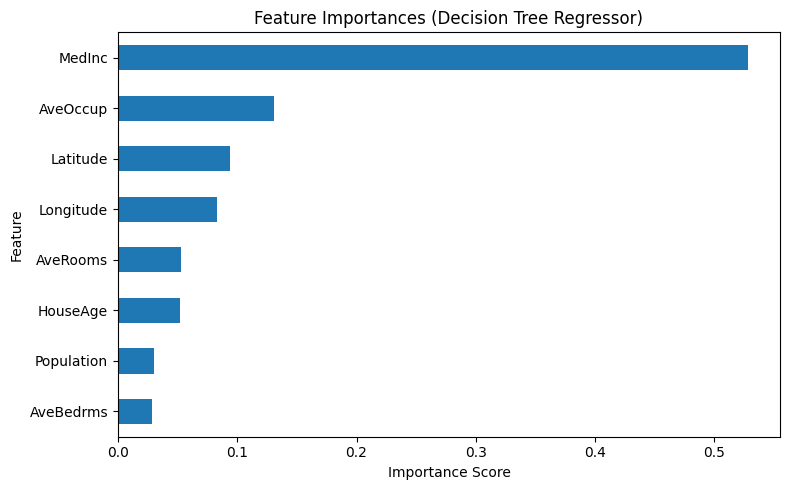

In [ ]:
8.# Write a Python program to: ● Load the Boston Housing Dataset ● Train a Decision Tree Regressor ● Print the Mean Squared Error (MSE) and feature importances.
# 📚 Step 1: Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 📊 Step 2: Load the California Housing dataset (Boston dataset is deprecated)
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

# 🧪 Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌳 Step 4: Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# 🎯 Step 5: Predict and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("✅ Mean Squared Error (MSE):", round(mse, 4))

# 📌 Step 6: Feature Importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n📊 Feature Importances:")
print(feature_importance_df)

# (Optional) 📈 Step 7: Bar Plot of Feature Importances
feature_importance_df.plot(kind='barh', x='Feature', y='Importance', legend=False, figsize=(8, 5))
plt.gca().invert_yaxis()
plt.title('Feature Importances (Decision Tree Regressor)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()



In [ ]:
9.# Write a Python program to: ● Load the Iris Dataset ● Tune the Decision Tree’s max_depth and min_samples_split using GridSearchCV ● Print the best parameters and the resulting model accuracy
# 📚 Step 1: Import required libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 📊 Step 2: Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target

# 🧪 Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 📦 Step 4: Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5]
}

# 🌳 Step 5: Create and run GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

# 📌 Step 6: Best Parameters and Accuracy
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("✅ Best Parameters:", best_params)
print("🎯 Model Accuracy with Best Parameters:", round(accuracy * 100, 2), "%")


✅ Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
🎯 Model Accuracy with Best Parameters: 100.0 %


10.Imagine you’re working as a data scientist for a healthcare company that
wants to predict whether a patient has a certain disease. You have a large dataset with
mixed data types and some missing values.
Explain the step-by-step process you would follow to:
● Handle the missing values
● Encode the categorical features
● Train a Decision Tree model
● Tune its hyperparameters
● Evaluate its performance
And describe what business value this model could provide in the real-world
setting.

Ans:-
## 🧠 Predicting Disease Presence Using Decision Trees (Healthcare Use Case)

Imagine you're working for a healthcare company that wants to build a model to predict whether a patient has a certain disease based on medical records. Here's how you would approach the problem step by step:


---

### 🛠️ 1. Handle Missing Values

- **Numerical features**: Fill missing values with the **mean**, **median**, or use **KNN imputation**.
- **Categorical features**: Replace missing values with the **mode** (most frequent) or create a new category like `'Unknown'`.

```python
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')  # or 'median'
cat_imputer = SimpleImputer(strategy='most_frequent')


🔤 2. Encode Categorical Features
Use One-Hot Encoding for nominal data (e.g., blood type).

Use Label Encoding for ordinal data (e.g., risk level: Low < Medium < High).


```
from sklearn.preprocessing import OneHotEncoder

```




3.Train a Decision Tree Model


```
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

```

🔧 4. Tune Hyperparameters with GridSearchCV
Search for best values for:

- max_depth: controls how deep the tree can grow

- min_samples_split: minimum samples required to split a node

- criterion: "gini" or "entropy"




In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

📊 5. Evaluate Model Performance
Use metrics such as:

- Accuracy (for balanced classes)

- Precision, Recall, F1-score (for imbalanced classes)

- Confusion Matrix

- ROC-AUC (for probability-based evaluation)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

